In [55]:
import pandas as pd
import json
import numpy as np
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

In [56]:
json_file_path = './user_data.json'
with open(json_file_path, 'r', encoding='UTF8') as file:
    user_data = json.load(file)

In [57]:
df_user = pd.DataFrame(user_data)
df_user['gender'] = pd.to_numeric(df_user['gender'], errors='coerce')
user_info = df_user[['age','gender','salary','money']].to_numpy()
user_info = pd.to_numeric(user_info.ravel(), errors='coerce').reshape(user_info.shape)
user_info

array([[        67,          1,  726000000,  126000000],
       [        91,          2, 1459000000,  202000000],
       [        79,          1,  654000000,  727000000],
       ...,
       [        73,          1, 1316000000,  867000000],
       [        79,          2,  138000000,  166000000],
       [         4,          1,  223000000, 1452000000]], dtype=int64)

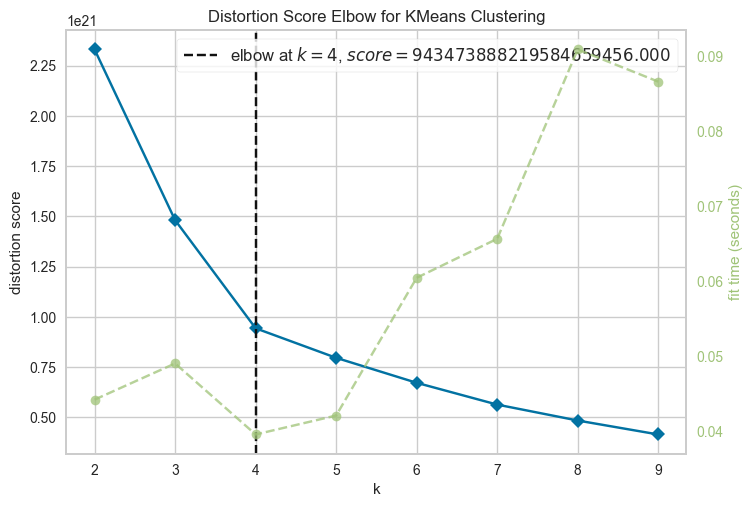

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
X = user_info

# Instantiate the clustering model and visualizer
km = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

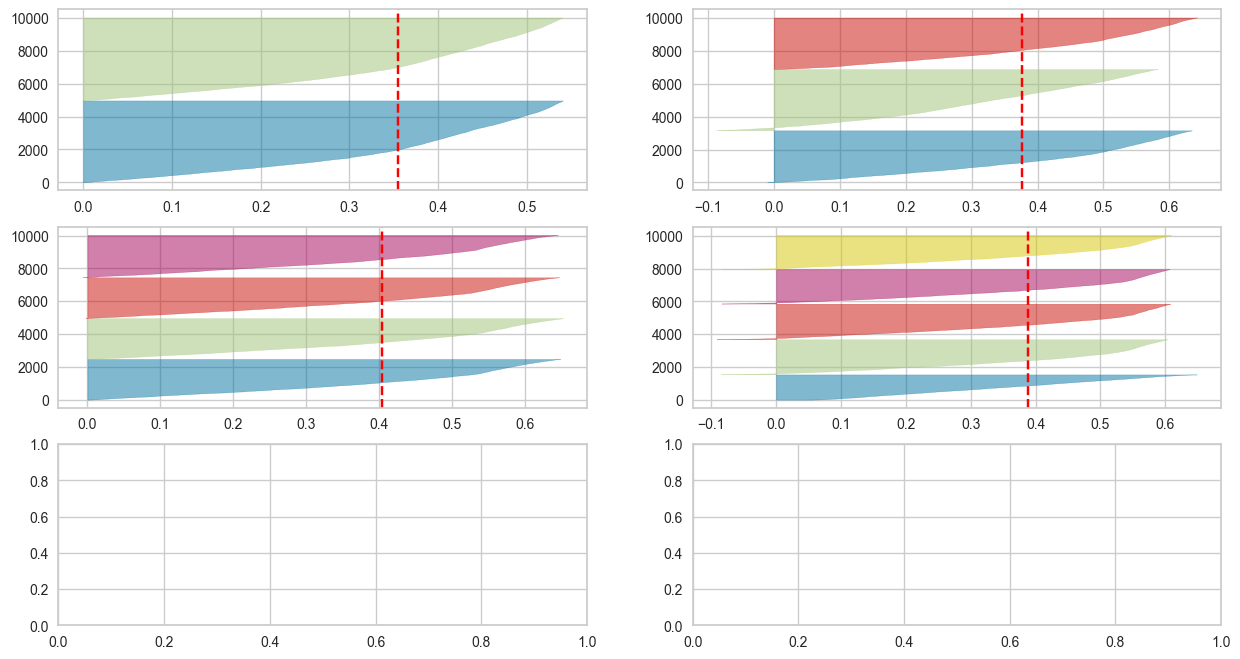

In [60]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [64]:
import plotly.graph_objects as go  #for 3D plot

## K-means using k = 4
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## 3D plot 
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),yaxis = dict(title  = 'sepal_width--->'),zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()